In [7]:
pressures_au = []

with open("d:/msc/summer_project/P_V_data.txt", "r") as file:
    # Read the first line (titles) and ignore it
    titles = file.readline()

    # Iterate through each remaining line in the file
    for line in file:
        # Split the line into columns using tab as the delimiter
        values_in_this_line = line.strip().split("\t")
        value_in_second_column = float(values_in_this_line[1])
        pressures_au.append(value_in_second_column)
        
pressures_GPa = [x* 2.9421015697e4 for x in pressures_au]
print(pressures_GPa)

[-20.477343977939405, -20.56169250415747, -14.84306771124407, -1.110408380198499, 5.625629622049159, 32.60032219848741]


In [24]:
2.9421e13/1e9


29421.0

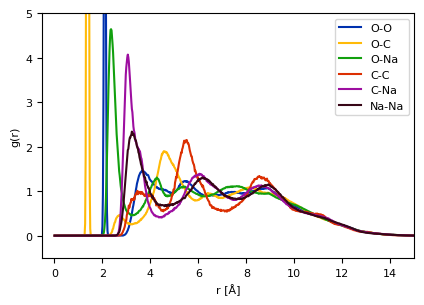

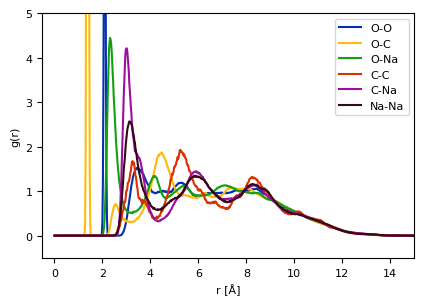

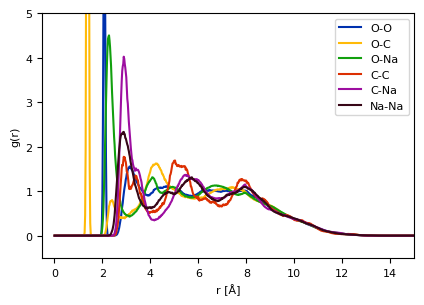

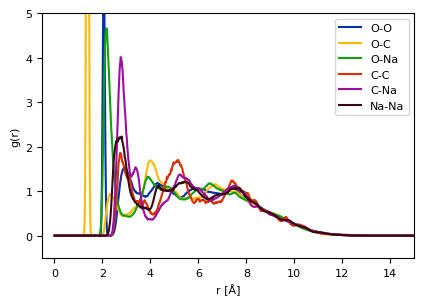

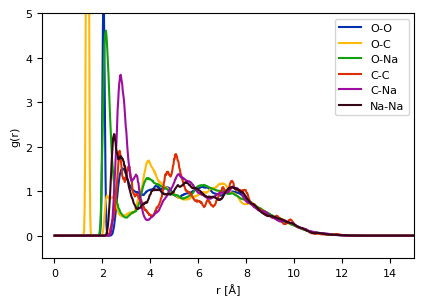

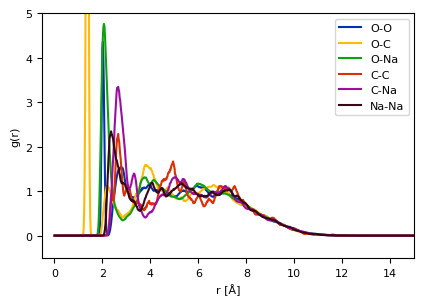

In [6]:
import matplotlib.pyplot as plt
import os

pressures = [1,2,3,4,5,6]
colours = ['#0031ae', '#ffba08', '#11A00E','#dc2f02', '#9d0ea0','#370617'] # using purple
#colours = ['#0031ae', '#ffba08', '#11A00E','#dc2f02', '#e20080','#370617'] # using pink

#9d0ea0

for p in range(6):
    fig = plt.figure(figsize=(4*1.2, 3*1.2))
    pressure = pressures[p]
    directory = 'D:/MSc/summer_project/p' + str(pressure)

    file_list = os.listdir(directory)
    file_list = [file for file in file_list if file.endswith('.txt')]

    labels = [x[7:9] for x in file_list]
    for i in range(len(labels)):
        label = labels[i]
        new_label = ''
        for character in label:
            if character == '1':
                new_label += 'O-'
            elif character == '2':
                new_label += 'C-'
            elif character == '3':
                new_label += 'Na-'
            else:
                print('Invalid character:', character)
                break
        new_label = new_label[:-1]
        labels[i] = new_label

    for i in range(len(file_list)):
        if file_list[i].endswith('.txt'):
            file_path = os.path.join(directory, file_list[i])
            with open(file_path, 'r') as file:
                data = file.readlines()
                x_values = []
                y_values = []
                for line in data:
                    x, y = map(float, line.split())  # Split the line and convert to floats
                    x_values.append(x)
                    y_values.append(y)
                # converting units
                x_values = [x*0.529177249 for x in x_values]
                ###
                plt.plot(x_values, y_values, label = labels[i], color = colours[i])

    font_size = 8
    plt.legend(fontsize=font_size)
    plt.xlim(-0.5,15)
    plt.ylim(-0.5,5)
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    plt.xlabel('r [Å]', fontsize=font_size)
    plt.ylabel('g(r)', fontsize=font_size)
    #plt.grid(True)
    title_pressure = "{:.2f}".format(pressures_GPa[p])
    plt.subplots_adjust(bottom=0.20)
    #plt.title('Radial Distribution Functions at P = {}'.format(title_pressure) + ' GPa')
    #plt.savefig(os.path.join(directory,'rdfs_at_p' + str(pressure)),dpi=400)
    plt.savefig('D:/MSc/summer_project/rdfs_at_p{}_zoomed'.format(pressure),dpi=1000)
    plt.show()

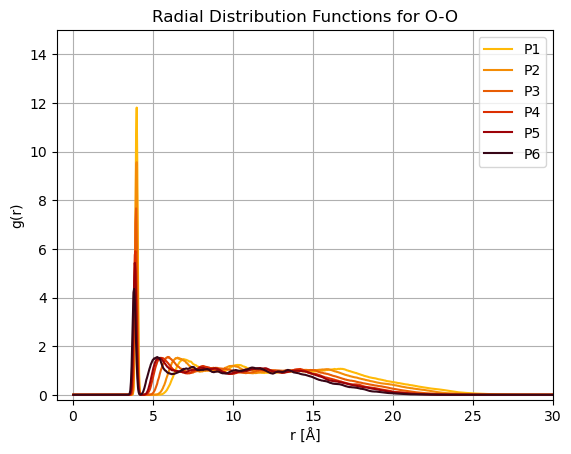

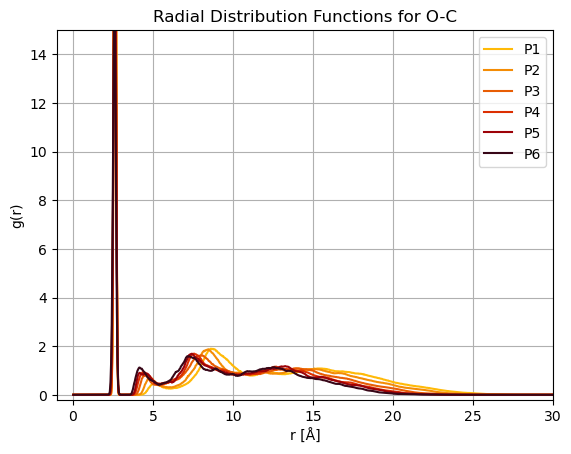

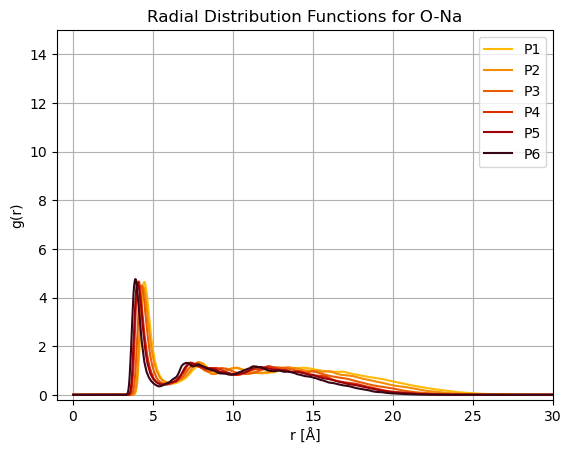

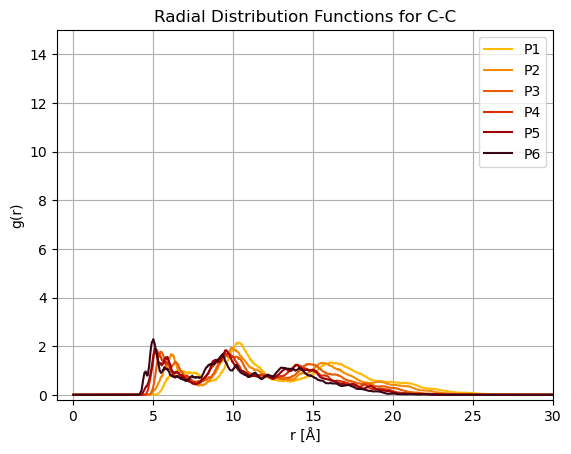

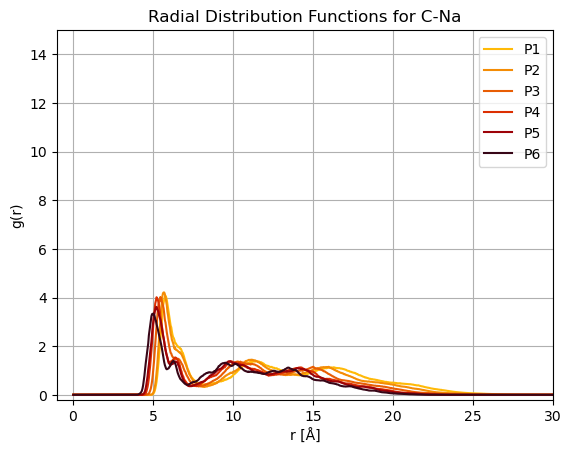

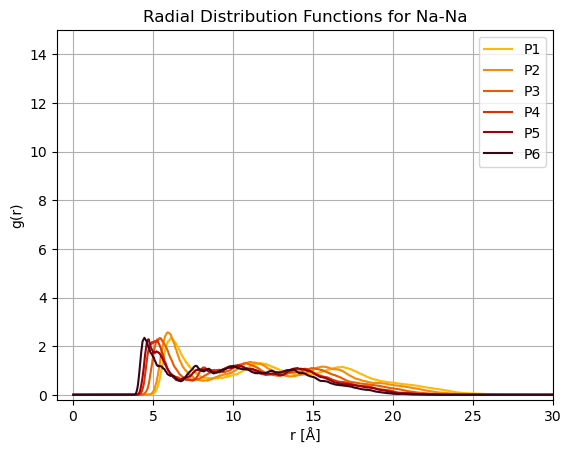

In [35]:
import os
import matplotlib.pyplot as plt

colours = ['#370617','#9d0208', '#dc2f02', '#e85d04', '#f48c06', '#ffba08']
colours.reverse()
pairs = ['111','121', '131', '221', '231','331']

pressures = [1, 2, 3, 4, 5, 6]
parent_directory = 'D:/MSc/summer_project/'

directories = [os.path.join(parent_directory, 'p' + str(pressure)) for pressure in pressures]

for pair in pairs:

    all_x_values = []
    all_y_values = []
    #legend_labels = []

    for dir in directories:
        file_path = os.path.join(dir, 'rdf.out' + pair + '.txt')
        with open(file_path, 'r') as file:
            data = file.readlines()
            x_values = []
            y_values = []
            for line in data:
                x, y = map(float, line.split())  # Split the line and convert to floats
                x_values.append(x)
                y_values.append(y)
            
            all_x_values.append(x_values)
            all_y_values.append(y_values)
            #legend_labels.append('P' + str(dir[-1]))

    for i in range(len(pressures)):
        x_values = all_x_values[i]
        y_values = all_y_values[i]
        label = 'P' + str(pressures[i])
        colour = colours[i]
        plt.plot(x_values, y_values, label = label, color = colour)


    # for x_values, y_values, label in zip(all_x_values, all_y_values, legend_labels):
    #     plt.plot(x_values, y_values, label=label)

    plt.legend()
    plt.xlim(-1,30)
    plt.ylim(-0.2,15)
    plt.xlabel('r [$a_0$]')
    plt.ylabel('g(r)')
    plt.grid(True)

    title_label = ''
    for character in pair[:-1]:
        if character == '1':
            title_label += 'O-'
        elif character == '2':
            title_label += 'C-'
        elif character == '3':
            title_label += 'Na-'
        else:
            print('Invalid character:', character)
            break
    title_label = title_label[:-1]
    
    plt.title('Radial Distribution Functions for ' + title_label)
    plt.show()

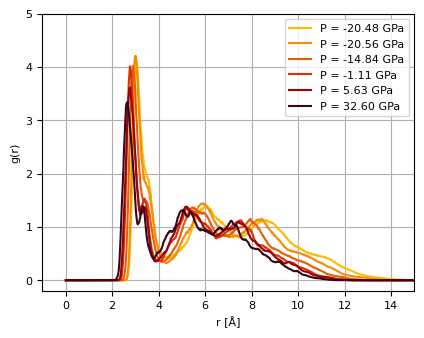

In [69]:
import os
import matplotlib.pyplot as plt

colours = ['#ffba08', '#f48c06', '#e85d04', '#dc2f02', '#9d0208', '#370617']
#pairs = ['111','121', '131', '221', '231','331']

pair = '231'
pressures = [1, 2, 3, 4, 5, 6]
parent_directory = 'D:/MSc/summer_project/'

directories = [os.path.join(parent_directory, 'p' + str(pressure)) for pressure in pressures]

all_x_values = []
all_y_values = []
#legend_labels = []

for dir in directories:
    file_path = os.path.join(dir, 'rdf.out' + pair + '.txt')
    with open(file_path, 'r') as file:
        data = file.readlines()
        x_values = []
        y_values = []
        for line in data:
            x, y = map(float, line.split())  # Split the line and convert to floats
            x_values.append(x)
            y_values.append(y)
        x_values = [x*0.529177249 for x in x_values] # converting into angstrom
        all_x_values.append(x_values)
        all_y_values.append(y_values)
        #legend_labels.append('P' + str(dir[-1]))

fig,ax = plt.subplots(figsize=(4*1.2, 3*1.2))
for i in range(6):
    x_values = all_x_values[i]
    y_values = all_y_values[i]
    title_pressure = "{:.2f}".format(pressures_GPa[i])
    label = 'P = {} GPa'.format(title_pressure)
    colour = colours[i]
    plt.plot(x_values, y_values, label = label, color = colour)

font_size = 8
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(font_size)

ax.legend(fontsize=font_size)
ax.set_yticks([x for x in range(6)])
ax.set_xticks([x*2 for x in range(28)])
plt.xlim(-1,15)
plt.ylim(-0.2,5)
plt.xlabel('r [Å]')
plt.ylabel('g(r)')
plt.grid(True)

title_label = ''
for character in pair[:-1]:
    if character == '1':
        title_label += 'O-'
    elif character == '2':
        title_label += 'C-'
    elif character == '3':
        title_label += 'Na-'
    else:
        print('Invalid character:', character)
        break
title_label = title_label[:-1]
#plt.title('Radial Distribution Functions for ' + title_label)

#plt.savefig('D:/MSc/summer_project/rdfs_for_' + title_label,dpi=1000)
plt.show()

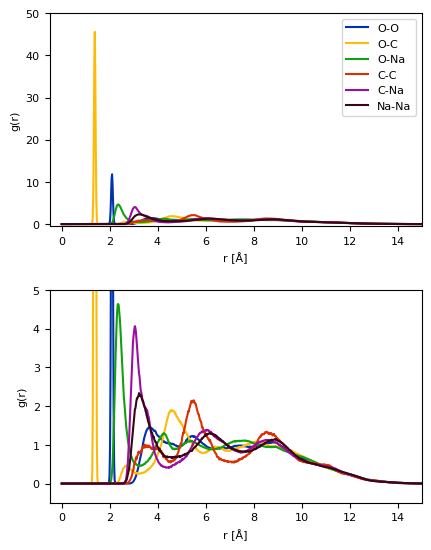

In [24]:
import matplotlib.pyplot as plt
import os

pressures = [1,2,3,4,5,6]
colours = ['#0031ae', '#ffba08', '#11A00E','#dc2f02', '#9d0ea0','#370617'] # using purple
#colours = ['#0031ae', '#ffba08', '#11A00E','#dc2f02', '#e20080','#370617'] # using pink

#9d0ea0
pressure = 1
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(4*1.2, 3*2.4))
plt.subplots_adjust(hspace=0.3)
ax1 = axes[0]
ax2 = axes[1]

pressure = pressures[p]
directory = 'D:/MSc/summer_project/p' + str(pressure)

file_list = os.listdir(directory)
file_list = [file for file in file_list if file.endswith('.txt')]

labels = [x[7:9] for x in file_list]
for i in range(len(labels)):
    label = labels[i]
    new_label = ''
    for character in label:
        if character == '1':
            new_label += 'O-'
        elif character == '2':
            new_label += 'C-'
        elif character == '3':
            new_label += 'Na-'
        else:
            print('Invalid character:', character)
            break
    new_label = new_label[:-1]
    labels[i] = new_label

for i in range(len(file_list)):
    if file_list[i].endswith('.txt'):
        file_path = os.path.join(directory, file_list[i])
        with open(file_path, 'r') as file:
            data = file.readlines()
            x_values = []
            y_values = []
            for line in data:
                x, y = map(float, line.split())  # Split the line and convert to floats
                x_values.append(x)
                y_values.append(y)
            # converting units
            x_values = [x*0.529177249 for x in x_values]
            ###
            ax1.plot(x_values, y_values, label = labels[i], color = colours[i])
            ax2.plot(x_values, y_values, label = labels[i], color = colours[i])

font_size = 8
ax1.set_ylabel('g(r)')
ax1.set_xlabel('r [Å]')
ax2.set_ylabel('g(r)')
ax2.set_xlabel('r [Å]')
ax1.set_xlim(-0.5, 15)
ax1.set_ylim(-0.5, 50)
ax2.set_xlim(-0.5, 15)
ax2.set_ylim(-0.5, 5)
for item in ([ax2.title, ax2.xaxis.label, ax2.yaxis.label] +
        ax2.get_xticklabels() + ax2.get_yticklabels()):
    item.set_fontsize(font_size)
for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label] +
        ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(font_size)

#ax2.legend(fontsize=font_size, ncol=3, loc='center', bbox_to_anchor=(0.5, -0.3))
ax1.legend(fontsize=font_size)
#plt.grid(True)
title_pressure = "{:.2f}".format(pressures_GPa[p])
plt.subplots_adjust(bottom=0.20)
#plt.savefig(os.path.join(directory,'rdfs_at_p' + str(pressure)),dpi=400)
plt.savefig('D:/MSc/summer_project/rdfs_at_p{}_both'.format(pressure),dpi=1000)
plt.show()